In [ ]:
# fake news detection

In [1]:
import pandas as pd 
import numpy as np 

In [2]:
import seaborn as sns

In [3]:
import neattext.functions as nfx 

In [5]:
pip install neattext

     |████████████████████████████████| 114 kB 55.9 MB/s            
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [5]:
df=pd.read_csv("data/dataset_pf.csv")

In [6]:
df.head()

,title,label
0,Texas law enforcement officer fatally shot upo...,fake
1,IT BEGINS: California Appoints FIRST Illegal A...,fake
2,Cannibals Arrested in Florida Claim Eating Hum...,fake
3,BREAKING: 60 People Just Found Dead In Ohio,fake
4,Alabama State Police Arrest 3 Poll Workers In ...,fake


In [7]:
df['label'].value_counts()

real    356
fake    338
Name: label, dtype: int64

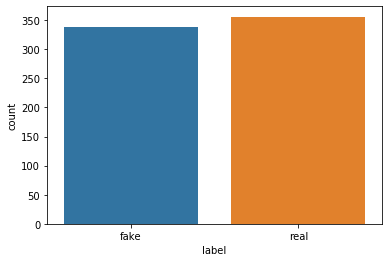

In [8]:
sns.countplot(x='label',data=df)

In [10]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [9]:
df.dropna(inplace=True)

In [12]:
df['clean_title']=df['title'].apply(nfx.remove_userhandles)

In [13]:
df['clean_title']=df['clean_title'].apply(nfx.remove_stopwords)

In [14]:
df

,title,label,clean_title
0,Texas law enforcement officer fatally shot upo...,fake,Texas law enforcement officer fatally shot arr...
1,IT BEGINS: California Appoints FIRST Illegal A...,fake,BEGINS: California Appoints Illegal Alien Stat...
2,Cannibals Arrested in Florida Claim Eating Hum...,fake,Cannibals Arrested Florida Claim Eating Human ...
3,BREAKING: 60 People Just Found Dead In Ohio,fake,BREAKING: 60 People Found Dead Ohio
4,Alabama State Police Arrest 3 Poll Workers In ...,fake,Alabama State Police Arrest 3 Poll Workers Bir...
...,...,...,...
689,TG-162: Treasury Announces $68 Billion in Expe...,real,TG-162: Treasury Announces $68 Billion Expecte...
690,NFIB,real,NFIB
691,Full Interview Transcript: President Barack Obama,real,Interview Transcript: President Barack Obama
692,- YouTube,real,- YouTube


In [18]:
df['label']=np.where(df['label']=='real',1,0)
df.head()

,id,title,text,source,label,followers_mean,followers_std,followers_median,followers_sum,friends_mean,...,retweets_mean,retweets_std,retweets_median,retweets_sum,statuses_mean,statuses_std,statuses_median,statuses_sum,verified_count,clean_text
0,politifact13999,Texas law enforcement officer fatally shot upo...,A highly regarded Texas law enforcement office...,https://web.archive.org,0,259.000000,0.000000,259.0,259,341.000000,...,0.000000,0.000000,0.0,0,33133.000000,33133.000000,33133.0,33133,0,highly regarded Texas law enforcement officer ...
1,politifact15379,IT BEGINS: California Appoints FIRST Illegal A...,Illegal aliens residing in the state of Califo...,https://web.archive.org,0,3808.263158,5527.238112,551.0,72357,3957.368421,...,0.157895,0.364642,0.0,3,78638.736842,78638.736842,36083.0,1494136,0,Illegal aliens residing state California defia...
2,politifact14238,Cannibals Arrested in Florida Claim Eating Hum...,"Police in Vernal Heights, Florida, arrested 3-...",http://dailybuzzlive.com,0,4534.726891,22566.445669,398.0,1079265,2391.911765,...,0.315126,1.631318,0.0,75,72421.033613,72421.033613,21765.0,17236206,6,"Police Vernal Heights, Florida, arrested 3-pra..."
3,politifact15399,BREAKING: 60 People Just Found Dead In Ohio,The death toll in one Ohio town continues to r...,https://web.archive.org,0,96467.358344,868374.311828,742.0,74569268,2030.117723,...,0.403622,2.275373,0.0,312,210866.593790,210866.593790,90925.0,162999877,85,death toll Ohio town continues rise 60 people ...
4,politifact14859,Alabama State Police Arrest 3 Poll Workers In ...,About Trendolizer™\n\nTrendolizer™ (patent pen...,http://polls.trendolizer.com,0,6033.092262,29913.929378,1080.5,2027119,3270.375000,...,10.047619,135.338016,0.0,3376,72220.363095,72220.363095,42811.0,24266042,4,Trendolizer™ Trendolizer™ (patent pending) aut...


In [15]:
Xfeatures=df['clean_title']
ylabels=df['label']

In [16]:
x_train,x_test,y_train,y_test=train_test_split(Xfeatures,ylabels,test_size=0.2,random_state=42)

In [17]:
from sklearn.pipeline import Pipeline

In [18]:
pipe_lr=Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [19]:
pipe_lr.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [20]:
pipe_lr.score(x_test,y_test)

0.7538461538461538

In [21]:
t = 'We will reach the moon by 2022!'
pipe_lr.predict([t])

array(['fake'], dtype=object)

In [22]:
pipe_lr.predict_proba([t])

array([[0.64406317, 0.35593683]])

In [23]:
pipe_lr.classes_

array(['fake', 'real'], dtype=object)

In [24]:
import joblib
pipeline_file=open('fake_classifier_pipe_lr_aug_2022.pkl','wb')
joblib.dump(pipe_lr, pipeline_file)
pipeline_file.close()

In [46]:
pip install --upgrade streamlit

     |████████████████████████████████| 9.1 MB 336 kB/s            
     |████████████████████████████████| 181 kB 7.4 MB/s            
     |████████████████████████████████| 235 kB 9.1 MB/s            
     |████████████████████████████████| 164 kB 8.2 MB/s            
     |████████████████████████████████| 23.9 MB 3.1 MB/s            
     |████████████████████████████████| 3.1 MB 5.2 MB/s            
     |████████████████████████████████| 63 kB 3.5 MB/s             
     |████████████████████████████████| 133 kB 9.8 MB/s            
     |████████████████████████████████| 51 kB 12.2 MB/s            
     |████████████████████████████████| 1.1 MB 10.5 MB/s            
  Attempting uninstall: pygments
    Found existing installation: Pygments 2.5.2
    Uninstalling Pygments-2.5.2:
      Successfully uninstalled Pygments-2.5.2
  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 1.1.1
    Uninstalling MarkupSafe-1.1.1:
      Successfully uninstalled MarkupS